In [3]:
from scipy.stats import invweibull  # Fréchet in scipy
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import weibull_min

# Fréchet (Heavy Tail)

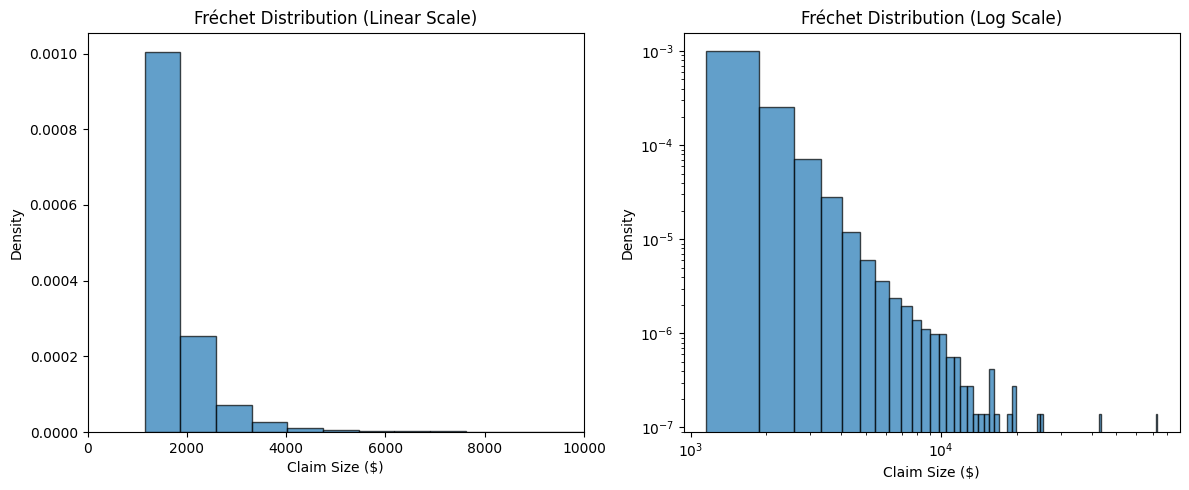

Mean claim: $1877
Median claim: $1605
99th percentile: $5753
Max claim: $73009

Mean >> Median: Sign of heavy tail!


In [2]:
# Generate Fréchet data (e.g., insurance claims)
xi = 0.5  # Shape parameter (heavier tail than Gumbel!)
mu, sigma = 1000, 500  # Location and scale ($)

# Note: scipy's invweibull(c) = Fréchet(1/c)
data = invweibull.rvs(1/xi, loc=mu, scale=sigma, size=10000)

# Plot on LOG scale to see power law
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=100, density=True, alpha=0.7, edgecolor='black')
plt.title('Fréchet Distribution (Linear Scale)')
plt.xlabel('Claim Size ($)')
plt.ylabel('Density')
plt.xlim(0, 10000)

plt.subplot(1, 2, 2)
plt.hist(data, bins=100, density=True, alpha=0.7, edgecolor='black')
plt.title('Fréchet Distribution (Log Scale)')
plt.xlabel('Claim Size ($)')
plt.ylabel('Density')
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

# Key insight: Power law tail
print(f"Mean claim: ${data.mean():.0f}")
print(f"Median claim: ${np.median(data):.0f}")
print(f"99th percentile: ${np.percentile(data, 99):.0f}")
print(f"Max claim: ${data.max():.0f}")
print(f"\nMean >> Median: Sign of heavy tail!")

# Weibull

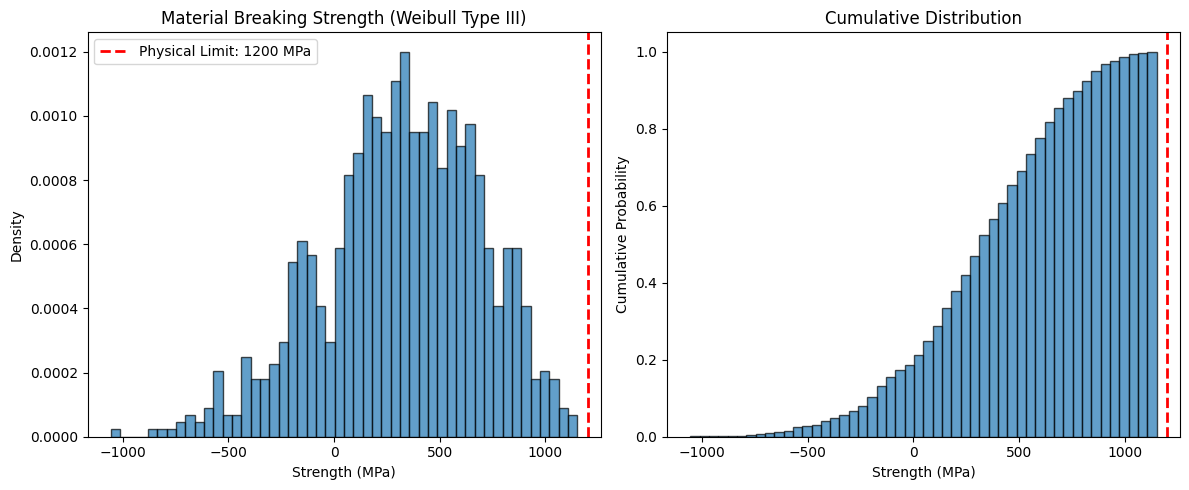

Mean strength: 320 MPa
Max observed: 1151 MPa
Physical limit: 1200 MPa

No value exceeds 1200 MPa!


In [4]:
# Generate Weibull data (e.g., material breaking strength)
# Note: Weibull is related to Reversed Weibull (Type III)
# For bounded upper tail, we use negated Weibull_max

shape = 2.5  # k parameter (related to ξ < 0)
scale = 1000  # Scale (related to strength)
upper_limit = 1200  # Physical limit (MPa)

# Generate data bounded from above
data = upper_limit - weibull_min.rvs(shape, scale=scale, size=1000)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(upper_limit, color='red', linestyle='--', linewidth=2, 
            label=f'Physical Limit: {upper_limit} MPa')
plt.title('Material Breaking Strength (Weibull Type III)')
plt.xlabel('Strength (MPa)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data, bins=50, density=True, cumulative=True, 
         alpha=0.7, edgecolor='black')
plt.axvline(upper_limit, color='red', linestyle='--', linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel('Strength (MPa)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

# Key insight: Hard upper limit
print(f"Mean strength: {data.mean():.0f} MPa")
print(f"Max observed: {data.max():.0f} MPa")
print(f"Physical limit: {upper_limit} MPa")
print(f"\nNo value exceeds {upper_limit} MPa!")